In [1]:
# Importando a lib do seaborn para pegar um dataset
import seaborn

# Listando os datasets disponíveis.
seaborn.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [2]:
# Carregando o dataset dos pinguins.
dataframe = seaborn.load_dataset('penguins')

# Visualização resumida.
dataframe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# Carregando o dataset dos pinguins.
dataframe = seaborn.load_dataset('penguins')

# Visualização resumida.
dataframe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
import pandas as pd

species_names = pd.unique(dataframe['species'])

In [7]:
species_names

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
# Importando o Ordinal encoder para transformação
from sklearn.preprocessing import OrdinalEncoder

# Instânciando o modelo.
model_ordinal = OrdinalEncoder()

# Verificando os nomes das colunas do tipo object
dataframe.select_dtypes(['object']).columns

# Saída do código acima:
# Index(['species', 'island', 'sex'], dtype='object')

Index(['species', 'island', 'sex'], dtype='object')

In [9]:
# Realizando a transformação das variáveis cat para num
tranf_values = model_ordinal.fit_transform(dataframe.select_dtypes(['object']))

tranf_values

# Substituindo os valores.
dataframe[dataframe.select_dtypes(['object']).columns] = tranf_values

dataframe

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,1.0
1,0.0,2.0,39.5,17.4,186.0,3800.0,0.0
2,0.0,2.0,40.3,18.0,195.0,3250.0,0.0
3,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,0.0,2.0,36.7,19.3,193.0,3450.0,0.0
...,...,...,...,...,...,...,...
339,2.0,0.0,NaN,NaN,NaN,NaN,NaN
340,2.0,0.0,46.8,14.3,215.0,4850.0,0.0
341,2.0,0.0,50.4,15.7,222.0,5750.0,1.0
342,2.0,0.0,45.2,14.8,212.0,5200.0,0.0


In [10]:
# Substituindo os dados nulos pela média.
dataframe.fillna(dataframe.mean(),inplace=True)

# Verificando novamente os dados nulos.
dataframe.isnull().sum()

# Deletando as linhas que restaram nulas.
dataframe.dropna(inplace=True)

In [11]:
# Pegando as variáveis de entrada do modelo
x = dataframe.drop(['species'], axis=1)

x

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2.0,39.10000,18.70000,181.000000,3750.000000,1.000000
1,2.0,39.50000,17.40000,186.000000,3800.000000,0.000000
2,2.0,40.30000,18.00000,195.000000,3250.000000,0.000000
3,2.0,43.92193,17.15117,200.915205,4201.754386,0.504505
4,2.0,36.70000,19.30000,193.000000,3450.000000,0.000000
...,...,...,...,...,...,...
339,0.0,43.92193,17.15117,200.915205,4201.754386,0.504505
340,0.0,46.80000,14.30000,215.000000,4850.000000,0.000000
341,0.0,50.40000,15.70000,222.000000,5750.000000,1.000000
342,0.0,45.20000,14.80000,212.000000,5200.000000,0.000000


In [12]:
# Pegando a variável de saída do modelo
y = dataframe['species']

y

,species
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
339,2.0
340,2.0
341,2.0
342,2.0


In [13]:
# importando a lib para validação cruzada.
from sklearn.model_selection import train_test_split

# Separando os dados em treino e teste.
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [14]:
# Importando a lib da floresta aleatória para classificação.
from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier(n_estimators=5, max_depth=6)

model_random.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=5)

In [15]:
# Importando a lib da floresta aleatória para classificação.
from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier(n_estimators=5, max_depth=6)

model_random.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=5)

In [16]:
model_random.estimators_[3]










DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                       random_state=2123459709)

[Text(0.5859375, 0.9285714285714286, 'flipper_length_mm <= 207.5\ngini = 0.646\nsamples = 178\nvalue = [121, 65, 89]\nclass = Adelie'),
 Text(0.359375, 0.7857142857142857, 'body_mass_g <= 3187.5\ngini = 0.478\nsamples = 119\nvalue = [120, 62, 5]\nclass = Adelie'),
 Text(0.47265625, 0.8571428571428572, 'True  '),
 Text(0.1875, 0.6428571428571429, 'bill_depth_mm <= 16.7\ngini = 0.091\nsamples = 15\nvalue = [20, 1, 0]\nclass = Adelie'),
 Text(0.125, 0.5, 'bill_length_mm <= 40.45\ngini = 0.444\nsamples = 2\nvalue = [2, 1, 0]\nclass = Adelie'),
 Text(0.0625, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [2, 0, 0]\nclass = Adelie'),
 Text(0.1875, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Chinstrap'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [18, 0, 0]\nclass = Adelie'),
 Text(0.53125, 0.6428571428571429, 'bill_length_mm <= 43.35\ngini = 0.501\nsamples = 104\nvalue = [100.0, 61.0, 5.0]\nclass = Adelie'),
 Text(0.375, 0.5, 'sex <= 0.252\ngini

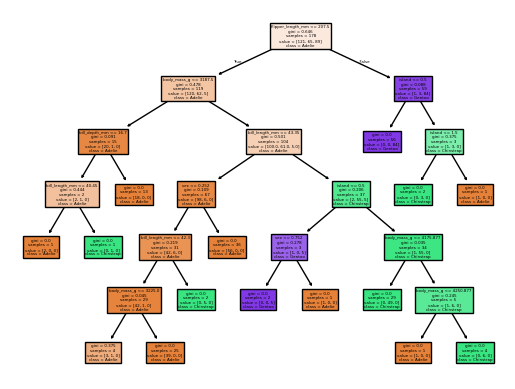

In [17]:
# Importando as libs para exportar a arquitetura da figura.
from sklearn.tree import plot_tree, export_graphviz
import graphviz

# Utilizando o plot simples
plot_tree(model_random.estimators_[3],
          feature_names=x.columns,
          class_names=species_names,
          filled=True)

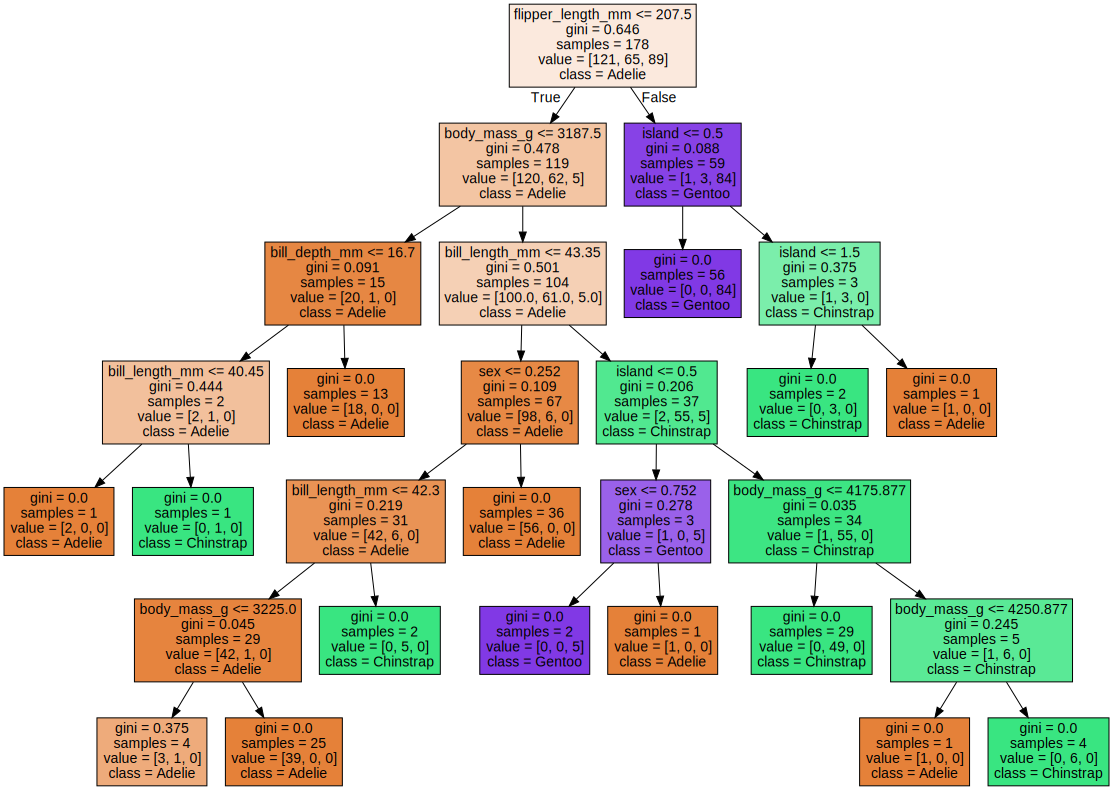

In [18]:
dot_data = export_graphviz(model_random.estimators_[3],
                           feature_names=x.columns,
                           class_names=species_names,
                           filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

In [19]:
>>> from sklearn.ensemble import RandomForestRegressor
>>> from sklearn.datasets import make_regression
>>> X, y = make_regression(n_features=4, n_informative=2,
...                        random_state=0, shuffle=False)
>>> regr = RandomForestRegressor(max_depth=2, random_state=0)
>>> regr.fit(X, y)
RandomForestRegressor(...)
>>> print(regr.predict([[0, 0, 0, 0]]))
[-8.32987858]

[-8.32987858]


[-8.32987858]